In [17]:
# Libraries
import numpy as np
import pandas as pd
from pathlib import Path, PurePosixPath
import os
import json

# CONSTANTS
# MODEL_FOLDER=str(Path('./models_20190226/').absolute())
MODEL_FOLDER=str(Path('./models_quickdraw_final/').absolute())

OUT_FILE = "20190330_quickdraw_models_with_distances.json"
LABELS_OUT_FILE = "quickdraw_labels.json"

# TRAINING_INFO_FILES = ["random_mast_20190226.json", "random_mast_20190227.json"]
# TRAINING_INFO_FILES = ["random_mast_0327.json", 'random_mast_0327b.json']
TRAINING_INFO_FILES = ['quickdraw_mast_025.json', 'quickdraw_mast_25100.json']

TRAINING_OUT_FILE = "20190330_quickdraw_training_results_data.json"

print("MODEL_FOLDER IS ", MODEL_FOLDER)

MODEL_FOLDER IS  C:\Users\Dylan Cashman\Work\School\Valt\mast\code\mast_snacs\pytorch_optimizer\optimizers\models_quickdraw_final


In [33]:
# Need to create the quickdraw labels file
from quickdraw_dataset import QuickdrawDataset
testset = QuickdrawDataset(mode='test')
true_labels = []

it = 0
# for (_, label) in testset:
for i in range(40000):
    (_, label) = testset[i]
    true_labels.append(label)
    it = it + 1

true_labels = pd.Series(true_labels)

print('it is ', it)
print("first five labels: ", true_labels[0:5])
print("middle five labels: ", true_labels[19998:20002])
print("last class transition: ", true_labels[35998:36002])
print("last class transition: ", true_labels[39998:40002])
print("last five labels: ", true_labels[-5:])

loading classname  face  and its shape is  (4000, 1, 28, 28)
loading classname  moustache  and its shape is  (4000, 1, 28, 28)
loading classname  pear  and its shape is  (4000, 1, 28, 28)
loading classname  umbrella  and its shape is  (4000, 1, 28, 28)
loading classname  pineapple  and its shape is  (4000, 1, 28, 28)
loading classname  mouth  and its shape is  (4000, 1, 28, 28)
loading classname  nose  and its shape is  (4000, 1, 28, 28)
loading classname  wine bottle  and its shape is  (4000, 1, 28, 28)
loading classname  apple  and its shape is  (4000, 1, 28, 28)
loading classname  octopus  and its shape is  (4000, 1, 28, 28)
it is  40000
first five labels:  0    0
1    0
2    0
3    0
4    0
dtype: int64
middle five labels:  19998    4
19999    4
20000    5
20001    5
dtype: int64
last class transition:  35998    8
35999    8
36000    9
36001    9
dtype: int64
last class transition:  39998    9
39999    9
dtype: int64
last five labels:  39995    9
39996    9
39997    9
39998    9
39

In [28]:
with open(LABELS_OUT_FILE, "w") as write_file:
#     json.dump(true_labels, write_file)
    json.dump(true_labels.values.tolist(), write_file)

In [29]:
import sys
print(sys.executable)

C:\ProgramData\Anaconda3\envs\mast_pytorch\python.exe


In [34]:
import glob
import os
from pathlib import Path
import re
import json

# Load model metadatas (and architectures) and predictions, calculates accuracies
# true_labels = pd.read_csv('cifar_test_labels.csv')['true_class']

def layersToSimpleString(layers):
    return ''.join([l['type'][0] for l in layers])

def load_model_info(model_filename):
    model_object = {}
    model_object['model_filename'] = model_filename
    
    # first, we get the uuid
    match = re.search('(.*)_metadata.json', model_filename)
    if not match:
        return False
    uuid = match.group(1)
    model_object['uuid'] = uuid
    # print("uuid is ", uuid)
    
    # then we load the model description from json
    model_object['json_filename'] = os.path.join(MODEL_FOLDER, uuid + '_metadata.json')
    with open(model_object['json_filename'], 'r') as f:
        json_data = json.load(f)
        
    # print("json_data")
    # quick check to see that the uuids match
    # assert(json_data['id'] == uuid)
    if (json_data['id'] != uuid):
        print("no uuid match for ", uuid)
        return False
    model_object['layers'] = json_data['_layers']
    model_object['id'] = uuid
    
    # next we load the model's predictions
    model_object['predictions_filename'] = os.path.join(MODEL_FOLDER, uuid + '_predictions.csv')
    
    if os.path.isfile(model_object['predictions_filename']):
        model_object['predictions'] = pd.read_csv(model_object['predictions_filename'])['predicted_class']
    else:
        print("no predictions match for ", uuid)
        return False # we short circuit it if it can't find the predictions
    # print("model_object_predictions loaded.  predictions are", model_object['predictions'])
    
    # lastly we calculate the accuracy
#     print("model_object['predictions'].shape is ", model_object['predictions'].shape)
#     print("true_labels.shape is ", true_labels.shape)
    model_object['correct'] = (model_object['predictions'] == true_labels).astype(bool).astype(int)
#     print("valAcc should be ", model_object['correct'].sum(), " / ", model_object['correct'].shape[0])
    model_object['valAcc'] = 1.0 * model_object['correct'].sum() / model_object['correct'].shape[0]
#     print("instead, it is ", model_object['valAcc'])
    # get string representation of the layers
    model_object['str_rep'] = layersToSimpleString(model_object['layers'])
    
    return model_object

model_filenames = os.listdir(MODEL_FOLDER)
model_objects = [load_model_info(model_filename) for model_filename in model_filenames if model_filename.endswith('json')]
num_model_objects = len(model_objects)
model_objects = [x for x in model_objects if x] # clear out the skipped models
filtered_num = len(model_objects)
print("Left with %d of %d total models due to missing full files" % (filtered_num, num_model_objects))

Left with 100 of 100 total models due to missing full files


In [35]:
model_objects[2]

{'model_filename': '0d8077a0-c073-4d37-94ec-2b541cf4e953_metadata.json',
 'uuid': '0d8077a0-c073-4d37-94ec-2b541cf4e953',
 'json_filename': 'C:\\Users\\Dylan Cashman\\Work\\School\\Valt\\mast\\code\\mast_snacs\\pytorch_optimizer\\optimizers\\models_quickdraw_final\\0d8077a0-c073-4d37-94ec-2b541cf4e953_metadata.json',
 'layers': [{'type': 'Conv2D',
   'strides': '1',
   'kernel_size': 5,
   'filters': 64},
  {'type': 'Activation', 'activation': 'relu'},
  {'type': 'Conv2D', 'strides': '1', 'kernel_size': 3, 'filters': 32},
  {'type': 'Activation', 'activation': 'relu'},
  {'type': 'Conv2D', 'strides': '1', 'kernel_size': 1, 'filters': 128},
  {'type': 'MaxPool', 'pool_size': 5},
  {'type': 'Dropout', 'rate': 0.375},
  {'type': 'Conv2D', 'strides': '1', 'kernel_size': 1, 'filters': 128},
  {'type': 'Dense', 'units': 10}],
 'id': '0d8077a0-c073-4d37-94ec-2b541cf4e953',
 'predictions_filename': 'C:\\Users\\Dylan Cashman\\Work\\School\\Valt\\mast\\code\\mast_snacs\\pytorch_optimizer\\optimi

In [39]:
import stringdist

# Assumes symmetric distance, yes I know that a distance must be symmetric.  metric, whatever
def calculate_distances(models, distance_func):
    nrows = len(models)
    distances = np.zeros((nrows, nrows))
    for i in range(nrows):
        for j in range(nrows):
            distance = distance_func(models[i], models[j])
            distances[i][j] = distance
            distances[j][i] = distance
            
    return distances

layer_mappings = {
    'Activation': 'A',
    'AveragePooling2D': 'B',
    'Conv2D': 'C',
    'Dense': 'D',
    'Dropout': 'E',
    'MaxPool': 'F'
}

def levenshtein_dis(row1, row2):
    # return stringdist.levenshtein(row1['str_rep'], row2['str_rep'])
    return stringdist.levenshtein(
        ''.join([layer_mappings[l['type']] for l in row1['layers']]), 
        ''.join([layer_mappings[l['type']] for l in row2['layers']]), 
    )

def euclidean_dis(row1, row2):
    #     For now, we don't have nparams available
    return row2['nparams'] - row1['nparams']

    return recursive_weighted_lev_dis(row1, row2)
    
def distance_between_layers(layer1, layer2):
    if (layer1['type'] != layer2['type']):
        print("layer type mismatch, layer1 ", layer1['type'], ", layer2 ", layer2['type'])
        
    if (layer1['type'] == 'Conv2D' and layer1['filters'] != layer2['filters']):
        # print('conv2d, layer1', layer1, ' and layer2', layer2)
        return 1.0 - abs(int(layer2['filters']) - int(layer1['filters']))/max((int(layer2['filters']), int(layer1['filters'])))
    elif (layer1['type'] == 'Dropout' and layer1['rate'] != layer2['rate']):
        return 1.0 - abs(float(layer2['rate']) - float(layer1['rate']))/max((float(layer2['rate']), float(layer1['rate'])))
    elif (layer1['type'] == 'Dense' and layer1['units'] != layer2['units']):
        return 1.0 - abs(float(layer2['units']) - float(layer1['units']))/max((float(layer2['units']), float(layer1['units'])))
    else:
        return 0.0
    
def weighted_levenshtein_dis(row1, row2):
    # implementation from wikipedia https://en.wikipedia.org/wiki/Levenshtein_distance
    # Uses dynamic programming, I edited it to have distances in [0,1], not just {0,1}

    # for all i and j, d[i,j] will hold the Levenshtein distance between
    # the first i characters of s and the first j characters of t
    # note that d has (m+1)*(n+1) values
    s = row1['str_rep']
    t = row2['str_rep']
    #print("s is ", s, " and t is ", t)
    m = len(s)
    n = len(t)
    d = np.zeros((m+1, n+1))

    
    # source prefixes can be transformed into empty string by
    # dropping all characters
    for i in range(m+1):
        d[i, 0] = i
 
    # target prefixes can be reached from empty source prefix
    # by inserting every character
    for j in range(n+1):
        d[0, j] = j
 
    for j in range(1,n+1):
        for i in range(1,m+1):
#             print("row1['layers'][i-1]['type'] is ", row1['layers'][i-1]['type'])
#             print("row2['layers'][j-1]['type'] is ", row2['layers'][j-1]['type'])
            if row1['layers'][i-1]['type'] == row2['layers'][j-1]['type']:
                substitutionCost = distance_between_layers(row1['layers'][i-1], row2['layers'][j-1])
                # print("substitution cost is ", substitutionCost)
            else:
                substitutionCost = 1
#             print('substitutionCost is ', substitutionCost)
            d[i, j] = min( (d[i-1, j] + 1,                   #deletion
                            d[i, j-1] + 1,                   #insertion
                            d[i-1, j-1] + substitutionCost))  #substitution
 
    return d[m, n]

In [40]:
model_objects[0]

{'model_filename': '01736bca-7afa-48cf-99bc-8627e88f88db_metadata.json',
 'uuid': '01736bca-7afa-48cf-99bc-8627e88f88db',
 'json_filename': 'C:\\Users\\Dylan Cashman\\Work\\School\\Valt\\mast\\code\\mast_snacs\\pytorch_optimizer\\optimizers\\models_quickdraw_final\\01736bca-7afa-48cf-99bc-8627e88f88db_metadata.json',
 'layers': [{'type': 'Conv2D',
   'strides': '1',
   'kernel_size': 3,
   'filters': 16},
  {'type': 'Dense', 'units': 10}],
 'id': '01736bca-7afa-48cf-99bc-8627e88f88db',
 'predictions_filename': 'C:\\Users\\Dylan Cashman\\Work\\School\\Valt\\mast\\code\\mast_snacs\\pytorch_optimizer\\optimizers\\models_quickdraw_final\\01736bca-7afa-48cf-99bc-8627e88f88db_predictions.csv',
 'predictions': 0        0
 1        0
 2        0
 3        9
 4        0
 5        0
 6        0
 7        0
 8        0
 9        0
 10       0
 11       0
 12       0
 13       0
 14       0
 15       9
 16       0
 17       0
 18       0
 19       0
 20       0
 21       4
 22       4
 23       0


In [41]:
weighted_distances = calculate_distances(model_objects, weighted_levenshtein_dis)
distances = calculate_distances(model_objects, levenshtein_dis)

from scipy.spatial.distance import hamming
hamming_distances = [[hamming(x['predictions'], y['predictions']) for y in model_objects] for x in model_objects]
hamming_distances[0]

[0.0,
 0.908325,
 0.1908,
 0.4007,
 0.099625,
 0.32685,
 0.144275,
 0.193475,
 0.25865,
 0.6009,
 0.188275,
 0.7422,
 0.180325,
 0.8852,
 0.859025,
 0.2391,
 0.17105,
 0.208325,
 0.3475,
 0.7095,
 0.151475,
 0.176325,
 0.202225,
 0.359925,
 0.357625,
 0.170625,
 0.162975,
 0.294425,
 0.287925,
 0.807825,
 0.260725,
 0.168325,
 0.2003,
 0.39065,
 0.206425,
 0.40635,
 0.3827,
 0.672725,
 0.176925,
 0.715275,
 0.18425,
 0.1339,
 0.168825,
 0.184875,
 0.381375,
 0.204175,
 0.1842,
 0.1672,
 0.9036,
 0.813925,
 0.14995,
 0.8933,
 0.1696,
 0.168525,
 0.1524,
 0.211225,
 0.945025,
 0.220925,
 0.167425,
 0.1296,
 0.22355,
 0.1835,
 0.1348,
 0.1704,
 0.425475,
 0.149725,
 0.8926,
 0.15475,
 0.275175,
 0.2275,
 0.12935,
 0.168125,
 0.896,
 0.182675,
 0.228375,
 0.1901,
 0.1921,
 0.18305,
 0.9036,
 0.692025,
 0.244875,
 0.89025,
 0.63295,
 0.218625,
 0.16115,
 0.153125,
 0.2414,
 0.9036,
 0.21625,
 0.137925,
 0.15305,
 0.470375,
 0.2505,
 0.232025,
 0.16415,
 0.1692,
 0.163775,
 0.18555,
 0.14437

In [42]:
# Calculate the k nearest neighbors
k = 5

def get_nearest_neighbors(model_distances, uuid):
    indices = np.argsort(model_distances)
    neighbors = [{'uuid': model_objects[index]['uuid'], 
                  'distance': model_distances[index], 
                  'valAcc': model_objects[index]['valAcc'],
                  'layers': model_objects[index]['layers']} for index in indices[0:k+1] if model_objects[index]['uuid'] != uuid]
    return neighbors

# for (i, model_object) in enumerate(model_objects):
#     model_object['neighbors'] = get_nearest_neighbors(distances[i])

print(get_nearest_neighbors(distances[1], model_objects[1]['uuid']))
# print(levenshtein_dis(model_objects[1], model_objects[1]))
# print(model_objects[1]['uuid'])

[{'uuid': '65067baf-8541-410f-b3d9-f4557301ca0f', 'distance': 3.0, 'valAcc': 0.882925, 'layers': [{'type': 'Conv2D', 'strides': '1', 'kernel_size': 3, 'filters': 32}, {'type': 'Activation', 'activation': 'tanh'}, {'type': 'Conv2D', 'strides': '1', 'kernel_size': 1, 'filters': 16}, {'type': 'Activation', 'activation': 'relu'}, {'type': 'Conv2D', 'strides': '1', 'kernel_size': 3, 'filters': 32}, {'type': 'Activation', 'activation': 'relu'}, {'type': 'Conv2D', 'strides': '1', 'kernel_size': 3, 'filters': 16}, {'type': 'Activation', 'activation': 'relu'}, {'type': 'Dropout', 'rate': 0.75}, {'type': 'AveragePooling2D', 'pool_size': 5}, {'type': 'Activation', 'activation': 'tanh'}, {'type': 'Dense', 'units': 10}]}, {'uuid': '89ead35e-3d92-4a8c-a7be-f155b2b229cc', 'distance': 3.0, 'valAcc': 0.8982, 'layers': [{'type': 'Conv2D', 'strides': '1', 'kernel_size': 5, 'filters': 128}, {'type': 'Activation', 'activation': 'tanh'}, {'type': 'Conv2D', 'strides': '1', 'kernel_size': 3, 'filters': 64}, {

In [43]:
# build model lookup table
model_lookup_table = {}
for (i, model) in enumerate(model_objects):
    model_lookup_table[model['uuid']] = i
    
# print out closest model architectures
print("printing out nearest neighbors for model", model_objects[1]['uuid'], ': ', model_objects[1]['str_rep'])
print("its layers are", model_objects[1]['layers'])

for neighbor in get_nearest_neighbors(distances[0], model_objects[0]['uuid']):
    m = model_objects[model_lookup_table[neighbor['uuid']]]
    print('Distance', neighbor['distance'], '-', m['uuid'], ':', m['str_rep'] )
    print(m['layers'])
    print('')

printing out nearest neighbors for model 0b8666fd-6317-4b9a-bd11-55ce109b34c7 :  CCACACACADD
its layers are [{'type': 'Conv2D', 'strides': '1', 'kernel_size': 3, 'filters': 16}, {'type': 'Conv2D', 'strides': '1', 'kernel_size': 1, 'filters': 32}, {'type': 'Activation', 'activation': 'sigmoid'}, {'type': 'Conv2D', 'strides': '1', 'kernel_size': 1, 'filters': 64}, {'type': 'Activation', 'activation': 'tanh'}, {'type': 'Conv2D', 'strides': '1', 'kernel_size': 3, 'filters': 16}, {'type': 'Activation', 'activation': 'sigmoid'}, {'type': 'Conv2D', 'strides': '1', 'kernel_size': 3, 'filters': 16}, {'type': 'Activation', 'activation': 'relu'}, {'type': 'Dropout', 'rate': 0.625}, {'type': 'Dense', 'units': 10}]
Distance 0.0 - 599eb620-5251-490f-8c7d-25b97f28ff19 : CD
[{'type': 'Conv2D', 'strides': '1', 'kernel_size': 1, 'filters': 16}, {'type': 'Dense', 'units': 10}]

Distance 0.0 - e1239241-f028-4109-8c2d-085475db233d : CD
[{'type': 'Conv2D', 'strides': '1', 'kernel_size': 5, 'filters': 64}, {

In [44]:
from scipy.spatial.distance import hamming
from scipy.stats import entropy

# store both weighted and unweighted nearest neighbors
for (i, model_object) in enumerate(model_objects):
    if 'predictions' in model_object:
        model_object['nearest_neighbors_unweighted'] = get_nearest_neighbors(distances[i], model_object['uuid'])
        model_object['nearest_neighbors_weighted'] = get_nearest_neighbors(weighted_distances[i], model_object['uuid'])

        # calculate the entropy of its neighborhood
        model_object['neighborhood_entropy_unweighted'] = entropy([model_object['valAcc']] + [m['valAcc'] for m in model_object['nearest_neighbors_unweighted']])
        model_object['neighborhood_entropy_weighted'] = entropy([model_object['valAcc']] + [m['valAcc'] for m in model_object['nearest_neighbors_weighted']])

        # calculate the hamming distance to its neighbors
        for (j, m) in enumerate(model_object['nearest_neighbors_unweighted']):
            if 'predictions' in model_objects[model_lookup_table[m['uuid']]]: 
                model_object['nearest_neighbors_unweighted'][j]['hamming_distance'] = hamming(model_object['predictions'],
                                                                                      model_objects[model_lookup_table[m['uuid']]]['predictions'])
            else:
                model_object['nearest_neighbors_unweighted'][j]['hamming_distance'] = 10.0

        for (j, m) in enumerate(model_object['nearest_neighbors_weighted']):
            if 'predictions' in model_objects[model_lookup_table[m['uuid']]]: 
                model_object['nearest_neighbors_weighted'][j]['hamming_distance'] = hamming(model_object['predictions'],
                                                                                      model_objects[model_lookup_table[m['uuid']]]['predictions'])
            else:
                model_object['nearest_neighbors_weighted'][j]['hamming_distance'] = 10.0

        # lastly, calculate entropy of the hamming distances
        model_object['neighborhood_prediction_entropy_unweighted'] = entropy([m['hamming_distance'] for m in model_object['nearest_neighbors_unweighted']])
        model_object['neighborhood_prediction_entropy_weighted'] = entropy([m['hamming_distance'] for m in model_object['nearest_neighbors_weighted']])

    # remove the now unnecessary prediction data frames
#     if 'predictions' in model_object:
#         del model_object['predictions']
    if 'correct' in model_object:
        del model_object['correct']
    

In [45]:
# del model_objects[0]['correct']

In [46]:
# model_objects[-1]
print(len(distances))
print(len(model_objects))
print(model_objects[0])

100
100
{'model_filename': '01736bca-7afa-48cf-99bc-8627e88f88db_metadata.json', 'uuid': '01736bca-7afa-48cf-99bc-8627e88f88db', 'json_filename': 'C:\\Users\\Dylan Cashman\\Work\\School\\Valt\\mast\\code\\mast_snacs\\pytorch_optimizer\\optimizers\\models_quickdraw_final\\01736bca-7afa-48cf-99bc-8627e88f88db_metadata.json', 'layers': [{'type': 'Conv2D', 'strides': '1', 'kernel_size': 3, 'filters': 16}, {'type': 'Dense', 'units': 10}], 'id': '01736bca-7afa-48cf-99bc-8627e88f88db', 'predictions_filename': 'C:\\Users\\Dylan Cashman\\Work\\School\\Valt\\mast\\code\\mast_snacs\\pytorch_optimizer\\optimizers\\models_quickdraw_final\\01736bca-7afa-48cf-99bc-8627e88f88db_predictions.csv', 'predictions': 0        0
1        0
2        0
3        9
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       9
16       0
17       0
18       0
19       0
20       0
21       4
22       4
23       0
24       0
25       0
26       9

In [47]:
# with open('nearest_neighbor_model_data.20190207.json', 'w') as outfile:
#     json.dump(model_objects, outfile)


In [48]:
len(model_objects)


100

In [49]:
%matplotlib inline
import matplotlib
# matplotlib.use('TkAgg')
from sklearn import manifold
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

def plot_mds(distances):
    pos, _ = project_mds(distances)
    fig, ax = plt.subplots()
    ax.plot(pos[:, 0], pos[:, 1], 'ro')
    for (i, p) in enumerate(pos):
        ax.annotate("".join([l['type'][0] for l in model_objects[i]['layers']]), (pos[i][0], pos[i][1]))
    fig.show()
    
def project_mds(distances):
    mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9)
    pos = mds.fit(distances).embedding_
    return pos, mds



In [50]:
from sklearn import manifold

def plot_tsne(distances):
    pos = project_tsne(distances)
    fig, ax = plt.subplots()
    ax.plot(pos[:, 0], pos[:, 1], 'ro')
    for (i, p) in enumerate(pos):
        ax.annotate("".join([l['type'][0] for l in model_objects[i]['layers']]), (pos[i][0], pos[i][1]))
    
    fig.show()
    
def project_tsne(distances):
    tsne = manifold.TSNE(n_components=2)
    pos = tsne.fit(distances).embedding_
    return pos


C:\ProgramData\Anaconda3\envs\mast_pytorch\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


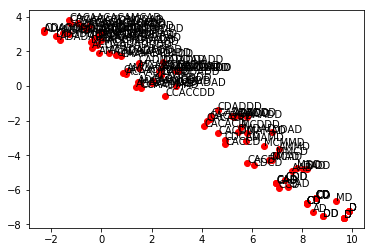

In [51]:
plot_tsne(distances)

C:\ProgramData\Anaconda3\envs\mast_pytorch\lib\site-packages\sklearn\manifold\mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"
C:\ProgramData\Anaconda3\envs\mast_pytorch\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


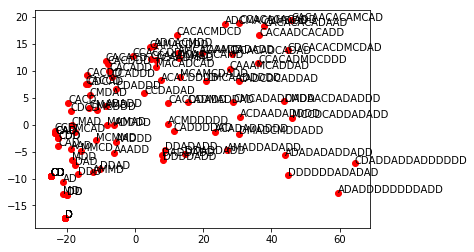

In [52]:
plot_mds(distances)

C:\ProgramData\Anaconda3\envs\mast_pytorch\lib\site-packages\sklearn\manifold\mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"
C:\ProgramData\Anaconda3\envs\mast_pytorch\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


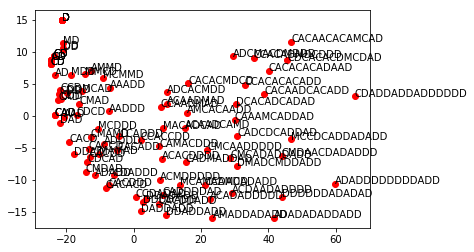

In [53]:
plot_mds(weighted_distances)

C:\ProgramData\Anaconda3\envs\mast_pytorch\lib\site-packages\sklearn\manifold\mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"
C:\ProgramData\Anaconda3\envs\mast_pytorch\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


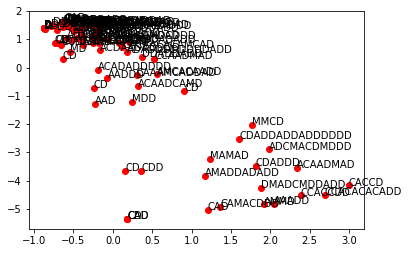

In [54]:
plot_mds(hamming_distances)

C:\ProgramData\Anaconda3\envs\mast_pytorch\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


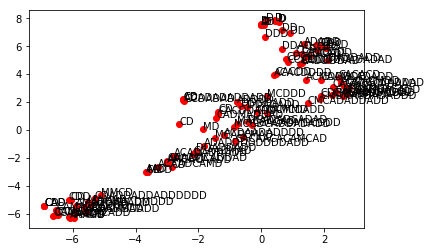

In [55]:
plot_tsne(hamming_distances)

In [56]:
# THIS ONLY WORKS IN PYTHON 2, SEE NEXT CELL

# # Here, we try to use the OTMANN distance from Kandasemy 2018
# # First, we have to convert each of our models to their neural network class
# import neural_network
# reload(neural_network)

# import nn_comparators
# reload(nn_comparators)
# from general_utils import get_dok_mat_with_set_coords

# # model_objects[0]['layers'] is [{u'type': u'Dense', u'units': 10}]
# # Based on unit tests for nn_comparators.py

# non_assignment_penalty = 1
# cnn_layer_labels, label_mismatch_penalty = \
#     nn_comparators.get_cnn_layer_label_mismatch_penalties(non_assignment_penalty)

# # We need to define our own layer labels and our own penalties
# print("cnn_layer_labels is ", cnn_layer_labels)
# print("label_mismatch_penalty.shape", label_mismatch_penalty.shape)
# # for j in label_mismatch_penalty:
# #     print(j)
# print("nn_comparators.CNN_STRUCTURAL_PENALTY_GROUPS", nn_comparators.CNN_STRUCTURAL_PENALTY_GROUPS)
# print("nn_comparators.PATH_LENGTH_TYPES", nn_comparators.PATH_LENGTH_TYPES)
# # print(nasbot.nn.neural_network)
# cnn_layer_labels = ['ip', 'op', 'dense', 
#                     'dropout', 'softmax', 
#                     'conv1', 'conv3', 'conv5', 
#                     'tanh', 'relu', 'sigmoid',
#                     'pool2', 'pool3', 'pool5']

# label_mismatch_penalty = []
# # ip penalties
# label_mismatch_penalty.append([0] + [np.inf]*13)
# # op penalties
# label_mismatch_penalty.append([np.inf, 0] + [np.inf]*12)
# # dense penalties
# label_mismatch_penalty.append([np.inf, np.inf, 0] + [np.inf]*11)
# # dropout penalties
# label_mismatch_penalty.append([np.inf]*3 + [0] + [np.inf]*10)
# # softmax penalties
# label_mismatch_penalty.append([np.inf]*4 + [0] + [np.inf]*9)
# # conv1 penalties
# label_mismatch_penalty.append([np.inf]*5 + [0, 0.2, 0.3] + [np.inf]*6)
# # conv3 penalties
# label_mismatch_penalty.append([np.inf]*5 + [0.2, 0, 0.2] + [np.inf]*6)
# # conv5 penalties
# label_mismatch_penalty.append([np.inf]*5 + [0.3, 0.2, 0] + [np.inf]*6)
# # tanh penalties
# label_mismatch_penalty.append([np.inf]*8 + [0, 0.25, 0.1] + [np.inf]*3)
# # relu penalties
# label_mismatch_penalty.append([np.inf]*8 + [0.25, 0, 0.25] + [np.inf]*3)
# # sigmoid penalties
# label_mismatch_penalty.append([np.inf]*8 + [0.1, 0.25, 0] + [np.inf]*3)
# # pool2 penalties
# label_mismatch_penalty.append([np.inf]*11 + [0, 0.2, 0.3])
# # pool3 penalties
# label_mismatch_penalty.append([np.inf]*11 + [0.2, 0, 0.2])
# # pool5 penalties
# label_mismatch_penalty.append([np.inf]*11 + [0.3, 0.2, 0])

# label_mismatch_penalty = np.array(label_mismatch_penalty)

# tp_comp = nn_comparators.OTMANNDistanceComputer(cnn_layer_labels,
#     label_mismatch_penalty, non_assignment_penalty,
#     nn_comparators.CNN_STRUCTURAL_PENALTY_GROUPS,
#     nn_comparators.PATH_LENGTH_TYPES,
#     dflt_mislabel_coeffs=1.0, dflt_struct_coeffs=1.0)

# # Then, we convert our models into these neural network classes
# def convert_layer_to_nasbot_layer(layer):
#     if layer['type'] == 'Activation':
#         return layer['activation']
#     elif layer['type'] == 'AveragePooling2D':
#         return 'pool' + str(layer['pool_size'])
#     elif layer['type'] == 'Conv2D':
#         return 'conv' + str(layer['kernel_size'])
#     elif layer['type'] == 'Dense':
#         return 'dense'
#     elif layer['type'] == 'Dropout':
#         return 'dropout'
#     else:
#         print("got unmatched layer type ", layer)

# def convert_layer_to_nasbot_filters(layer):
#     if layer['type'] == 'Conv2D':
#         return layer['filters']
#     elif layer['type'] == 'Dense':
#         return layer['units']
#     else:
#         return None
    
# def convert_layer_to_nasbot_stride(layer):
#     if layer['type'] == 'Conv2D':
#         return 1
#     elif layer['type'] == 'AveragePooling2D':
#         return 2
#     else:
#         return None    

# def convert_model_object_to_nasbot_model(model_object):
#     # for now, our connectivity matrix is just 1s on the up off diagonal, because
#     # we have strictly feed forward layers
#     layers = model_object['layers']
#     num_layers = len(layers) + 3 # for input, softmax, and output
    
#     connection_coords = []
#     for j in range(1, num_layers):
#         connection_coords.append((j-1, j))

#     connectivity_matrix = get_dok_mat_with_set_coords(num_layers, connection_coords)
#     # print("layers are ", layers)
#     # print("connectivity_matrix is ", connectivity_matrix.keys())
#     conv = neural_network.ConvNeuralNetwork(
#         ['ip'] + [convert_layer_to_nasbot_layer(l) for l in layers] + ['softmax', 'op'],
#         connectivity_matrix,
#         [None] + [convert_layer_to_nasbot_filters(l) for l in layers] + [None, None],
#         [None] + [convert_layer_to_nasbot_stride(l) for l in layers] + [None, None],
#         cnn_layer_labels
#         )
    
#     return conv

# for (i, model_object) in enumerate(model_objects):
#     model_objects[i]['nasbot_model'] = convert_model_object_to_nasbot_model(model_object)


# # Then, we can use their distance function to calculate distances
# print("calculating otmann_distances...")
# nasbot_models = [m['nasbot_model'] for m in model_objects]

# otmann_distances = tp_comp.evaluate(nasbot_models, nasbot_models)

# # otmann_distances = np.zeros((num_model_objects, num_model_objects))
# # for (i, model_object_1) in enumerate(model_objects[0:4]):
# #     for (j, model_object_2) in enumerate(model_objects[0:4]):
# # #         print("calcluating otmann distances between ", (model_object_1['layers'], model_object_2['layers']))
# # #         print("calcluating otmann distances between ", (model_object_1['nasbot_model'], model_object_2['nasbot_model']))
# #         distance = tp_comp.evaluate_single(model_object_1['nasbot_model'], model_object_2['nasbot_model'])
# # #         otmann_distances[i,j] = tp_comp.evaluate_single(model_object_1['nasbot_model'], model_object_2['nasbot_model'])


# print("they are...")
# otmann_distances = otmann_distances[0]
# print(otmann_distances)
# plot_mds(otmann_distances)
# # [[tp_comp(x['predictions'], y['predictions']) for y in model_objects] for x in model_objects]
# # otmann_distances[0]

cnn_layer_labels is  ['ip', 'op', 'fc', 'max-pool', 'avg-pool', 'softmax', 'conv3', 'res3', 'conv5', 'res5', 'conv7', 'res7']
label_mismatch_penalty.shape (12, 12)
nn_comparators.CNN_STRUCTURAL_PENALTY_GROUPS ['all', 'conv', 'pool', 'fc']
nn_comparators.PATH_LENGTH_TYPES ['shortest', 'longest', 'rw']
calculating otmann_distances...
they are...
[[     0.   13172.7  59274.2 ... 197776.7  88528.6   1806.2]
 [ 13172.7      0.   55799.4 ... 207007.9  98920.2  14546.4]
 [ 59274.2  55799.4      0.  ... 210202.4 134254.4  59283.2]
 ...
 [197776.7 207007.9 210202.4 ...      0.  257598.1 197345.9]
 [ 88528.6  98920.2 134254.4 ... 257598.1      0.   87907.2]
 [  1806.2  14546.4  59283.2 ... 197345.9  87907.2      0. ]]


C:\ProgramData\Anaconda3\envs\mast_pytorch\lib\site-packages\sklearn\manifold\mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"
C:\ProgramData\Anaconda3\envs\mast_pytorch\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


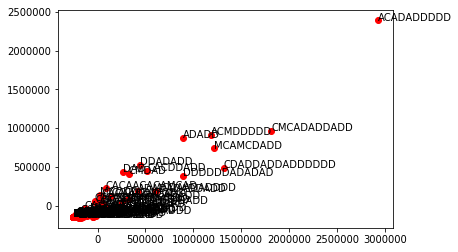

In [58]:
# THIS IS OTMANN DISTANCES CODE IN PYTHON 3
# THIS ONLY WORKS IN PYTHON 2, SEE NEXT CELL

# Here, we try to use the OTMANN distance from Kandasemy 2018
# First, we have to convert each of our models to their neural network class
import neural_network
# reload(neural_network)

import nn_comparators
# reload(nn_comparators)
from general_utils import get_dok_mat_with_set_coords

# model_objects[0]['layers'] is [{u'type': u'Dense', u'units': 10}]
# Based on unit tests for nn_comparators.py

non_assignment_penalty = 1
cnn_layer_labels, label_mismatch_penalty = \
    nn_comparators.get_cnn_layer_label_mismatch_penalties(non_assignment_penalty)

# We need to define our own layer labels and our own penalties
print("cnn_layer_labels is ", cnn_layer_labels)
print("label_mismatch_penalty.shape", label_mismatch_penalty.shape)
# for j in label_mismatch_penalty:
#     print(j)
print("nn_comparators.CNN_STRUCTURAL_PENALTY_GROUPS", nn_comparators.CNN_STRUCTURAL_PENALTY_GROUPS)
print("nn_comparators.PATH_LENGTH_TYPES", nn_comparators.PATH_LENGTH_TYPES)
# print(nasbot.nn.neural_network)
cnn_layer_labels = ['ip', 'op', 'dense', 
                    'dropout', 'softmax', 
                    'conv1', 'conv3', 'conv5', 
                    'tanh', 'relu', 'sigmoid',
                    'pool2', 'pool3', 'pool5']

label_mismatch_penalty = []
# ip penalties
label_mismatch_penalty.append([0] + [np.inf]*13)
# op penalties
label_mismatch_penalty.append([np.inf, 0] + [np.inf]*12)
# dense penalties
label_mismatch_penalty.append([np.inf, np.inf, 0] + [np.inf]*11)
# dropout penalties
label_mismatch_penalty.append([np.inf]*3 + [0] + [np.inf]*10)
# softmax penalties
label_mismatch_penalty.append([np.inf]*4 + [0] + [np.inf]*9)
# conv1 penalties
label_mismatch_penalty.append([np.inf]*5 + [0, 0.2, 0.3] + [np.inf]*6)
# conv3 penalties
label_mismatch_penalty.append([np.inf]*5 + [0.2, 0, 0.2] + [np.inf]*6)
# conv5 penalties
label_mismatch_penalty.append([np.inf]*5 + [0.3, 0.2, 0] + [np.inf]*6)
# tanh penalties
label_mismatch_penalty.append([np.inf]*8 + [0, 0.25, 0.1] + [np.inf]*3)
# relu penalties
label_mismatch_penalty.append([np.inf]*8 + [0.25, 0, 0.25] + [np.inf]*3)
# sigmoid penalties
label_mismatch_penalty.append([np.inf]*8 + [0.1, 0.25, 0] + [np.inf]*3)
# pool2 penalties
label_mismatch_penalty.append([np.inf]*11 + [0, 0.2, 0.3])
# pool3 penalties
label_mismatch_penalty.append([np.inf]*11 + [0.2, 0, 0.2])
# pool5 penalties
label_mismatch_penalty.append([np.inf]*11 + [0.3, 0.2, 0])

label_mismatch_penalty = np.array(label_mismatch_penalty)

tp_comp = nn_comparators.OTMANNDistanceComputer(cnn_layer_labels,
    label_mismatch_penalty, non_assignment_penalty,
    nn_comparators.CNN_STRUCTURAL_PENALTY_GROUPS,
    nn_comparators.PATH_LENGTH_TYPES,
    dflt_mislabel_coeffs=1.0, dflt_struct_coeffs=1.0)

# Then, we convert our models into these neural network classes
def convert_layer_to_nasbot_layer(layer):
    if layer['type'] == 'Activation':
        return layer['activation']
    elif layer['type'] == 'AveragePooling2D' or layer['type'] == 'MaxPool':
        return 'pool' + str(layer['pool_size'])
    elif layer['type'] == 'Conv2D':
        return 'conv' + str(layer['kernel_size'])
    elif layer['type'] == 'Dense':
        return 'dense'
    elif layer['type'] == 'Dropout':
        return 'dropout'
    else:
        print("got unmatched layer type ", layer)

def convert_layer_to_nasbot_filters(layer):
    if layer['type'] == 'Conv2D':
        return layer['filters']
    elif layer['type'] == 'Dense':
        return layer['units']
    else:
        return None
    
def convert_layer_to_nasbot_stride(layer):
    if layer['type'] == 'Conv2D':
        return 1
    elif layer['type'] == 'AveragePooling2D':
        return 2
    else:
        return None    

def convert_model_object_to_nasbot_model(model_object):
    # for now, our connectivity matrix is just 1s on the up off diagonal, because
    # we have strictly feed forward layers
    layers = model_object['layers']
    num_layers = len(layers) + 3 # for input, softmax, and output
    
    connection_coords = []
    for j in range(1, num_layers):
        connection_coords.append((j-1, j))

    connectivity_matrix = get_dok_mat_with_set_coords(num_layers, connection_coords)
    # print("layers are ", layers)
    # print("connectivity_matrix is ", connectivity_matrix.keys())
    conv = neural_network.ConvNeuralNetwork(
        ['ip'] + [convert_layer_to_nasbot_layer(l) for l in layers] + ['softmax', 'op'],
        connectivity_matrix,
        [None] + [convert_layer_to_nasbot_filters(l) for l in layers] + [None, None],
        [None] + [convert_layer_to_nasbot_stride(l) for l in layers] + [None, None],
        cnn_layer_labels
        )
    
    return conv

for (i, model_object) in enumerate(model_objects):
    model_objects[i]['nasbot_model'] = convert_model_object_to_nasbot_model(model_object)


# Then, we can use their distance function to calculate distances
print("calculating otmann_distances...")
nasbot_models = [m['nasbot_model'] for m in model_objects]

otmann_distances = tp_comp.evaluate(nasbot_models, nasbot_models)

# otmann_distances = np.zeros((num_model_objects, num_model_objects))
# for (i, model_object_1) in enumerate(model_objects[0:4]):
#     for (j, model_object_2) in enumerate(model_objects[0:4]):
# #         print("calcluating otmann distances between ", (model_object_1['layers'], model_object_2['layers']))
# #         print("calcluating otmann distances between ", (model_object_1['nasbot_model'], model_object_2['nasbot_model']))
#         distance = tp_comp.evaluate_single(model_object_1['nasbot_model'], model_object_2['nasbot_model'])
# #         otmann_distances[i,j] = tp_comp.evaluate_single(model_object_1['nasbot_model'], model_object_2['nasbot_model'])


print("they are...")
otmann_distances = otmann_distances[0]
print(otmann_distances)
plot_mds(otmann_distances)
# [[tp_comp(x['predictions'], y['predictions']) for y in model_objects] for x in model_objects]
# otmann_distances[0]

In [59]:
print(otmann_distances.shape)
print(distances.shape)

(100, 100)
(100, 100)


C:\ProgramData\Anaconda3\envs\mast_pytorch\lib\site-packages\sklearn\manifold\mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"
C:\ProgramData\Anaconda3\envs\mast_pytorch\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


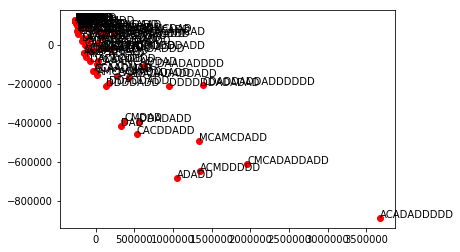

In [60]:
plot_mds(otmann_distances)

In [61]:
# Let's build JSON data structure with models, their layer info, and 
# x, y coordinates (unnormalized?) from the various projections

# Load up the projections
print("calculating mds coords...")
mds_coords, mds_model = project_mds(distances)
mds_weighted_coords, mds_weighted_model = project_mds(weighted_distances)
mds_hamming_coords, mds_hamming_model = project_mds(hamming_distances)
mds_otmann_coords, mds_otmann_model = project_mds(otmann_distances)

print("calculating tsne coords...")
tsne_coords = project_tsne(distances).tolist()
tsne_weighted_coords = project_tsne(weighted_distances).tolist()
tsne_hamming_coords = project_tsne(hamming_distances).tolist()
tsne_otmann_coords = project_tsne(otmann_distances).tolist()

# Then, we store the coords
for (i, model_object) in enumerate(model_objects):
    model_objects[i]['projections'] = {}
    model_objects[i]['projections']['mds_unweighted'] = {'x': mds_coords[i][0], 'y': mds_coords[i][1]}
    model_objects[i]['projections']['mds_weighted'] = {'x': mds_weighted_coords[i][0], 'y': mds_weighted_coords[i][1]}    
    model_objects[i]['projections']['mds_hamming'] = {'x': mds_hamming_coords[i][0], 'y': mds_hamming_coords[i][1]}    
    model_objects[i]['projections']['mds_otmann'] = {'x': mds_otmann_coords[i][0], 'y': mds_otmann_coords[i][1]}    

    model_objects[i]['projections']['tsne_unweighted'] = {'x': float(tsne_coords[i][0]), 'y': float(tsne_coords[i][1])}
    model_objects[i]['projections']['tsne_weighted'] = {'x': float(tsne_weighted_coords[i][0]), 'y': float(tsne_weighted_coords[i][1])}    
    model_objects[i]['projections']['tsne_hamming'] = {'x': float(tsne_hamming_coords[i][0]), 'y': float(tsne_hamming_coords[i][1])}    
    model_objects[i]['projections']['tsne_otmann'] = {'x': float(tsne_otmann_coords[i][0]), 'y': float(tsne_otmann_coords[i][1])}    
    

calculating mds coords...


C:\ProgramData\Anaconda3\envs\mast_pytorch\lib\site-packages\sklearn\manifold\mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"
C:\ProgramData\Anaconda3\envs\mast_pytorch\lib\site-packages\sklearn\manifold\mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"
C:\ProgramData\Anaconda3\envs\mast_pytorch\lib\site-packages\sklearn\manifold\mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"
C:\Program

calculating tsne coords...


In [62]:
json.dumps(model_objects[0]['projections'])

'{"mds_unweighted": {"x": 23.88691852106667, "y": -11.390673257110686}, "mds_weighted": {"x": -20.80113179435195, "y": -15.431247474098553}, "mds_hamming": {"x": 0.5398791129215318, "y": -0.970599706154963}, "mds_otmann": {"x": -279272.5213539827, "y": -80560.35388492119}, "tsne_unweighted": {"x": 4.339353561401367, "y": -0.9917412400245667}, "tsne_weighted": {"x": 0.013391328044235706, "y": 3.7941181659698486}, "tsne_hamming": {"x": 2.6064486503601074, "y": -0.9865826964378357}, "tsne_otmann": {"x": -8.93543815612793, "y": 1.1963419914245605}}'

In [63]:
print("writing out to json")
# Simplify, write just what we need.
new_model_objects = [None] * len(model_objects)
for (i, model_object) in enumerate(model_objects):
    new_model_objects[i] = {}
    new_model_objects[i]['projections'] = model_objects[i]['projections']
    new_model_objects[i]['layers'] = model_objects[i]['layers']
    

# with open(OUT_FILE, "w") as write_file:
#     json.dump(new_model_objects, write_file)

writing out to json


In [64]:
from sklearn.cluster import AgglomerativeClustering

def calculate_agglomerative_clustering(coords):
    clustering = AgglomerativeClustering(n_clusters=2).fit(mds_otmann_coords)

    clustering_tree = clustering.children_
    n_samples = len(clustering.labels_)
    node_depths = [None] * (2 * n_samples - 1)
    for i in range((2 * n_samples - 1)):
        node_depths[i] = {'children': [], 'depth': 0}
    
    for (i, node_info) in enumerate(clustering_tree):
        for child_idx in node_info:
            nodes_to_visit = [child_idx]
            while (len(nodes_to_visit) > 0):
                curr_node_idx = nodes_to_visit.pop()
                node_depths[curr_node_idx]['depth'] = node_depths[curr_node_idx]['depth'] + 1

                for grandchild_idx in node_depths[curr_node_idx]['children']:
                    nodes_to_visit.append(grandchild_idx)

            node_depths[i + n_samples]['children'].append(child_idx)

    return node_depths
    
print("calculating clusterings for MDS coords")

mds_clusterings = calculate_agglomerative_clustering(mds_coords)
mds_weighted_clusterings = calculate_agglomerative_clustering(mds_weighted_coords)
mds_hamming_clusterings = calculate_agglomerative_clustering(mds_hamming_coords)
mds_otmann_clusterings = calculate_agglomerative_clustering(mds_otmann_coords)

tsne_clusterings = calculate_agglomerative_clustering(tsne_coords)
tsne_weighted_clusterings = calculate_agglomerative_clustering(tsne_weighted_coords)
tsne_hamming_clusterings = calculate_agglomerative_clustering(tsne_hamming_coords)
tsne_otmann_clusterings = calculate_agglomerative_clustering(tsne_otmann_coords)


calculating clusterings for MDS coords


In [65]:
for (i, model_object) in enumerate(new_model_objects):
    new_model_objects[i]['projections']['mds_unweighted']['depth'] = mds_clusterings[i]['depth']
    new_model_objects[i]['projections']['mds_weighted']['depth'] = mds_weighted_clusterings[i]['depth']
    new_model_objects[i]['projections']['mds_hamming']['depth'] = mds_hamming_clusterings[i]['depth']
    new_model_objects[i]['projections']['mds_otmann']['depth'] = mds_otmann_clusterings[i]['depth']
    new_model_objects[i]['projections']['tsne_unweighted']['depth'] = tsne_clusterings[i]['depth']
    new_model_objects[i]['projections']['tsne_weighted']['depth'] = tsne_weighted_clusterings[i]['depth']
    new_model_objects[i]['projections']['tsne_hamming']['depth'] = tsne_hamming_clusterings[i]['depth']
    new_model_objects[i]['projections']['tsne_otmann']['depth'] = tsne_otmann_clusterings[i]['depth']

    new_model_objects[i]['val_acc'] = model_objects[i]['valAcc']
    new_model_objects[i]['id'] = model_objects[i]['id']

# with open("20190220_models_with_distances.json", "w") as write_file:
#     json.dump(new_model_objects, write_file)

In [66]:
len(new_model_objects)

100

In [67]:
# We're going to add interpretable axes to the projections
# First, Hen's idea with x axis test accuracy, y axis # parameters (or log #), color = (test_acc - train_acc)
# Need to get the num params from the training file
training_info_dict = {}

training_info = []
for filename in TRAINING_INFO_FILES:
    with open(filename) as f:
        training_info += json.load(f)
print(len(training_info))        
with open(TRAINING_OUT_FILE, "w") as write_file:
    json.dump(training_info, write_file)

for t in training_info:
    if t['uid'] not in training_info_dict:
        training_info_dict[t['uid']] = {}
    
    if 'val_accs' not in training_info_dict[t['uid']]:
        training_info_dict[t['uid']]['val_accs'] = []

    if 'train_accs' not in training_info_dict[t['uid']]:
        training_info_dict[t['uid']]['train_accs'] = []

    if 'forward_time' in t['values']:
        training_info_dict[t['uid']]['forward_time'] = t['values']['forward_time']
    
    if 'backward_time' in t['values']:
        training_info_dict[t['uid']]['backward_time'] = t['values']['backward_time']
        
    if 'val_acc' in t['values']:
        training_info_dict[t['uid']]['val_accs'].append(t['values']['val_acc'])
        
    if 'train_acc' in t['values']:
        training_info_dict[t['uid']]['train_accs'].append(t['values']['train_acc'])
        
    if 'final_val_acc' in t['values']:
        training_info_dict[t['uid']]['final_val_acc'] = t['values']['final_val_acc']
        
    if 'final_train_acc' in t['values']:
        training_info_dict[t['uid']]['train_acc'] = t['values']['final_train_acc']
        
    if 'parameters' in t['values']:
        training_info_dict[t['uid']]['parameters'] = t['values']['parameters']

# Then, we fill in the new_model_objects
for (i, model_object) in enumerate(new_model_objects):
    model_id = model_object['id']
    if model_id in training_info_dict:
        info = training_info_dict[model_id]
        new_model_objects[i]['val_acc'] = max(info['val_accs'])
        new_model_objects[i]['train_acc'] = max(info['train_accs'])
        new_model_objects[i]['parameters'] = info['parameters']
        new_model_objects[i]['forward_time'] = info['forward_time']
        new_model_objects[i]['backward_time'] = info['backward_time']

for (i, model_object) in enumerate(new_model_objects):
    new_model_objects[i]['projections']['hendrik'] = {'x': model_object['val_acc'], 'y': model_object['parameters'], 
                                                      'colorScore': model_object['val_acc'] - model_object['train_acc']}


918


In [68]:
training_info_dict

{'8f0d51f7-6496-473d-95d1-7983cd6644b7': {'val_accs': [0.787175,
   0.8034,
   0.8098000000000001,
   0.812025,
   0.814975,
   0.8157],
  'train_accs': [0.72868125,
   0.80156875,
   0.811975,
   0.81781875,
   0.820825,
   0.82278125],
  'parameters': 7850,
  'forward_time': 503.8333333333333,
  'backward_time': 27.712647833333335,
  'final_val_acc': 81.57,
  'train_acc': 0.82278125},
 '35f4a215-d717-44eb-9017-6bfe297f19f2': {'val_accs': [0.7866500000000001,
   0.80315,
   0.808275,
   0.8122750000000001,
   0.8143250000000001,
   0.8155500000000001,
   0.81595],
  'train_accs': [0.727125,
   0.8012,
   0.8122125,
   0.8174375,
   0.8206125,
   0.822525,
   0.82425],
  'parameters': 7850,
  'forward_time': 427.42857142857144,
  'backward_time': 26.52264257142857,
  'final_val_acc': 81.595,
  'train_acc': 0.82425},
 'e0927e18-9089-416a-8806-2d5866391398': {'val_accs': [0.81605,
   0.818475,
   0.8249,
   0.8305750000000001,
   0.8342],
  'train_accs': [0.79905, 0.82340625, 0.83013125,

In [69]:
from sklearn import metrics

# model_objects[0]['predictions']
print("giving it a shot here")
def generate_confusion_matrix_bins(truelabels, predlabels):
    # need to roll our own because sklearn doesn't produce bins
    # Using https://stackoverflow.com/questions/21153865/obtain-indices-corresponding-to-instances-for-each-type-of-error-in-a-confusion
    return [[[int(x) for x in np.where(np.array(np.logical_and(truelabels==r, predlabels==c)))[0].tolist()] for c in range(10)] for r in range(10)]
#     return np.where(np.array([[np.logical_and(truelabels==r, predlabels==c) for c in range(10)] for r in range(10)]))

model_object = model_objects[0]
print("first confusion matrix, sklearn:", metrics.confusion_matrix(true_labels, model_object['predictions']).tolist())
my_confusion_matrix = generate_confusion_matrix_bins(true_labels, model_object['predictions'])
# print("my confusion matrix: ", my_confusion_matrix)
print("my_confusion_matrix shape: ", [len(x) for x in my_confusion_matrix])
# print("first binis ", np.where(np.array(my_confusion_matrix[0][0])))
print("first bin is ", my_confusion_matrix[0][0])


giving it a shot here
first confusion matrix, sklearn: [[3390, 41, 0, 62, 129, 123, 26, 8, 62, 159], [157, 3195, 0, 38, 38, 200, 77, 4, 26, 265], [52, 22, 0, 11, 174, 10, 1563, 739, 1402, 27], [107, 23, 0, 3710, 50, 33, 21, 9, 13, 34], [88, 6, 0, 38, 3686, 16, 11, 16, 65, 74], [232, 155, 0, 26, 17, 3224, 61, 1, 29, 255], [77, 119, 0, 23, 32, 40, 3390, 84, 112, 123], [35, 19, 0, 22, 147, 17, 171, 3382, 134, 73], [52, 44, 0, 8, 84, 23, 62, 24, 3688, 15], [106, 43, 0, 30, 32, 170, 45, 1, 6, 3567]]
my_confusion_matrix shape:  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
first bin is  [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 23, 24, 25, 28, 29, 30, 32, 33, 35, 36, 37, 38, 40, 41, 45, 46, 47, 48, 49, 51, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 1

In [70]:
# print(OUT_FILE)
# # print(new_model_objects[0])
# with open(OUT_FILE, "w") as write_file:
#     json.dump(new_model_objects, write_file)

In [71]:
print("my confusion matrix: ", len(generate_confusion_matrix_bins(true_labels, model_object['predictions'])))

my confusion matrix:  10


In [72]:
my_confusion_matrix = generate_confusion_matrix_bins(true_labels, model_object['predictions'])

In [73]:
def calculate_accuracies(confusion_matrix):
    total_true = [0 for _ in range(10)]
    total_predicted = [0 for _ in range(10)]
    total_correct = [0 for _ in range(10)]
    accuracies = [0.0 for _ in range(10)]

    for i in range(10):
        for j in range(10):
            count = len(confusion_matrix[i][j])
            if (i == j):
                total_correct[i] = count

            total_true[i] = total_true[i] + count
            total_predicted[j] = total_predicted[j] + count

#     print("len(true_labels): ", len(true_labels))
#     print("len(predicted):", len(model_object['predictions']))
#     print("total_true:", total_true)
#     print("total_predicted:", total_predicted)
#     print("total_correct:", total_correct)
    
    for i in range(10):
        accuracies[i] = 1.0 * total_correct[i] / total_true[i]
    return accuracies

calculate_accuracies(my_confusion_matrix)

[0.8475, 0.79875, 0.0, 0.9275, 0.9215, 0.806, 0.8475, 0.8455, 0.922, 0.89175]

In [74]:

for (i, model_object) in enumerate(model_objects):
    new_model_objects[i]['confusion_matrix'] = generate_confusion_matrix_bins(true_labels, model_object['predictions'])
    new_model_objects[i]['class_accuracies'] = calculate_accuracies(new_model_objects[i]['confusion_matrix'])
    new_model_objects[i]['metrics'] = {}
    new_model_objects[i]['metrics']['accuracy'] = metrics.accuracy_score(true_labels, model_object['predictions'])
    new_model_objects[i]['metrics']['f1_micro'] = metrics.f1_score(true_labels, model_object['predictions'], average='micro')
    new_model_objects[i]['metrics']['f1_macro'] = metrics.f1_score(true_labels, model_object['predictions'], average='macro')
    new_model_objects[i]['metrics']['precision_micro'] = metrics.precision_score(true_labels, model_object['predictions'], average='micro')
    new_model_objects[i]['metrics']['precision_macro'] = metrics.precision_score(true_labels, model_object['predictions'], average='macro')
    new_model_objects[i]['metrics']['recall_micro'] = metrics.recall_score(true_labels, model_object['predictions'], average='micro')
    new_model_objects[i]['metrics']['recall_macro'] = metrics.recall_score(true_labels, model_object['predictions'], average='macro')



C:\ProgramData\Anaconda3\envs\mast_pytorch\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\envs\mast_pytorch\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [75]:
print(OUT_FILE)
# print(new_model_objects[0])
with open(OUT_FILE, "w") as write_file:
    json.dump(new_model_objects, write_file)

20190330_quickdraw_models_with_distances.json


In [76]:
# for i in xrange(10):
#     print str(i)

In [77]:
# We need to pickle the projection models for use in the server
# Note we use joblib's implementation of dump and load, rather than pickle, by suggestion from sklearn
# https://scikit-learn.org/stable/modules/model_persistence.html
# from joblib import dump, load
# dump(mds_hamming_model, 'mds_hamming_model_20190313.joblib') 
# dump(mds_otmann_model, 'mds_otmann_model_20190313.joblib') 


['mds_otmann_model_20190313.joblib']

In [88]:
# Actually, we'll try pickle also, since this stuff is all python 2 and the server is python 3...
# joblib can't do that, hopefully pickle can?
# import pickle
# pickle.dump(mds_hamming_model, open('mds_hamming_model_20190313.pickle', 'wb')) 
# pickle.dump(mds_otmann_model, open('mds_otmann_model_20190313.pickle', 'wb')) 


In [89]:
# mds_hamming = pickle.load(open('mds_hamming_model_20190313.pickle', 'rb'))


In [78]:
# We also need to save the information that is needed to calculate hamming and otmann distance to new models
distance_model_objects = []
for model_object in model_objects:
    new_distance_model_object = {}
    new_distance_model_object['layers'] = model_object['layers']
    new_distance_model_object['predictions'] = model_object['predictions'].tolist()
    new_distance_model_object['projections'] = model_object['projections']
    new_distance_model_object['id'] = model_object['id']
    distance_model_objects.append(new_distance_model_object)
    
with open("20190330_quickdraw_model_projection_data.json", "w") as write_file:
    json.dump(distance_model_objects, write_file)

In [79]:
np_hamming_distances = np.array(hamming_distances)
np_otmann_distances = np.array(otmann_distances)

In [80]:
np.savetxt('hamming_distances_quickdraw_20190330.csv', np_hamming_distances, delimiter=',')
np.savetxt('otmann_distances_quickdraw_20190330.csv', np_otmann_distances, delimiter=',')

In [81]:
np_hamming_coords = np.array(mds_hamming_coords)
np_otmann_coords = np.array(mds_otmann_coords)

In [82]:
np.savetxt('hamming_projected_coords_quickdraw_20190330.csv', np_hamming_coords, delimiter=',')
np.savetxt('otmann_projected_coords_quickdraw_20190330.csv', np_otmann_coords, delimiter=',')

In [83]:
np.array(distance_model_objects[0]['predictions']).shape

(40000,)